<big><b> Capstone Project: The Battle of Neighborhoods </b> </big>

Opening an Indian Restaurant in Houston, TX
Build a dataframe of neighborhoods - via web scraping the data from Wikipedia page <br />
Get the geographical coordinates of the neighborhoods <br />
Obtain the venue data for the neighborhoods from Foursquare API <br />
Explore and cluster the neighborhoods <br />
Select the best cluster to open a new Indian Restaurant

Import Pandas & NumPy. Pandas is an open source, BSD-licensed library, providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


In [6]:
!conda install -c conda-forge folium=0.5.0 
!conda install -c conda-forge geopy
!conda install -c conda-forge/label/gcc7 geocoder
!conda install -c conda-forge/label/cf201901 geocoder
!pip install wikipedia

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [61]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [62]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.colors as colors

In [63]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Greater_Houston").text

In [64]:
soup = BeautifulSoup(data, 'html.parser')

In [65]:
# create a list to store neighborhood data
neighborhoodList = []

In [66]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [67]:
# create a new DataFrame from the list
houston_df = pd.DataFrame({"Neighborhood": neighborhoodList})

houston_df.head()

,Neighborhood
0,"► Baytown, Texas‎ (1 C, 16 P)"
1,"► Bellaire, Texas‎ (1 C, 7 P)"
2,"► Brazoria County, Texas‎ (6 C, 16 P)"
3,"► Chambers County, Texas‎ (7 C, 4 P)"
4,► Clear Creek Independent School District‎ (1...


In [68]:
# print the number of rows of the dataframe
houston_df.shape

(22, 1)

In [69]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Huston, Texas'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [70]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in houston_df["Neighborhood"].tolist() ]

In [71]:
coords

[[29.731875421057065, -94.96707764195861],
 [29.69655000000006, -95.57528999999994],
 [29.17961870266114, -95.41048108421748],
 [29.775886838463528, -94.67831149987104],
 [29.81275000000005, -95.56174999999996],
 [29.678734468050816, -95.40549086728137],
 [29.538751922223952, -95.44863530091952],
 [29.656875972295396, -95.24496395550231],
 [29.50795089084908, -95.09351483573761],
 [29.658619108852896, -95.2283389183761],
 [29.76058000000006, -95.36967999999996],
 [29.588706000000002, -95.29742925],
 [29.713948454575267, -95.27834956821908],
 [30.30020488200006, -95.50304877199994],
 [29.771910000000002, -95.45593275],
 [29.56452739356328, -95.28500620549781],
 [29.76058000000006, -95.36967999999996],
 [29.562258295698577, -95.81010629569856],
 [29.661901627314506, -95.30196358956188],
 [39.04983000000004, -84.89553999999998],
 [29.596948626309263, -95.62089641173351],
 [30.5574088548674, -95.62085367029245]]

In [72]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [73]:
# merge the coordinates into the original dataframe
houston_df['Latitude'] = df_coords['Latitude']
houston_df['Longitude'] = df_coords['Longitude']

In [74]:
# check the neighborhoods and the coordinates
print(houston_df.shape)
houston_df

(22, 3)


,Neighborhood,Latitude,Longitude
0,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078
1,"► Bellaire, Texas‎ (1 C, 7 P)",29.696550,-95.575290
2,"► Brazoria County, Texas‎ (6 C, 16 P)",29.179619,-95.410481
3,"► Chambers County, Texas‎ (7 C, 4 P)",29.775887,-94.678311
4,► Clear Creek Independent School District‎ (1...,29.812750,-95.561750
5,"► Conroe, Texas‎ (1 C, 31 P)",29.678734,-95.405491
6,"► Fort Bend County, Texas‎ (6 C, 11 P)",29.538752,-95.448635
7,"► Galveston Bay Area‎ (8 C, 96 P)",29.656876,-95.244964
8,"► Galveston County, Texas‎ (8 C, 15 P)",29.507951,-95.093515
9,"► Harris County, Texas‎ (12 C, 53 P)",29.658619,-95.228339


In [75]:
# save the DataFrame as CSV file
 houston_df.to_csv("houston_df.csv", index=False)

In [76]:
# get the coordinates of Houston, TX
address = 'Houston, Texas'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
Latitude = location.latitude
Longitude = location.longitude
print('The geograpical coordinate of Houston, Texas {}, {}.'.format(Latitude, Longitude))

The geograpical coordinate of Houston, Texas 29.7589382, -95.3676974.


<big> <b> Create a map of Houston, TX with neighborhoods </b> </big>

In [95]:
# create map of Houston using latitude and longitude values
map_houston = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(houston_df['Latitude'], houston_df['Longitude'], houston_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_houston)  
    
map_houston

<big> <b> Using Foursquare API to explore the neighborhoods </b> </big>

In [79]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [80]:
#Send the GET request and examine the results
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d127941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4cbf112b00d837047b8a415c,910 Louisiana St,US,Houston,United States,NaN,81,"[910 Louisiana St, Houston, TX 77002, United S...","[{'label': 'display', 'lat': 29.75967067970318...",29.759671,-95.367728,NaN,77002,TX,Baker Botts LLP,v-1581804056,NaN
1,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",NaN,NaN,NaN,NaN,NaN,NaN,False,527096a111d2393d1fc331aa,920 Louisiana St,US,Houston,United States,Walker St,23,"[920 Louisiana St (Walker St), Houston, TX 770...","[{'label': 'display', 'lat': 29.75911177161870...",29.759112,-95.367565,NaN,77002,TX,The Houston Club,v-1581804056,NaN
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b993b14f964a520d76b35e3,910 Louisiana St,US,Houston,United States,at McKinney,41,"[910 Louisiana St (at McKinney), Houston, TX 7...","[{'label': 'display', 'lat': 29.75928328897705...",29.759283,-95.367858,NaN,77002,TX,One Shell Plaza,v-1581804056,NaN
3,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",NaN,NaN,NaN,NaN,NaN,NaN,False,5b3b978a56ca62001c94580e,910 Louisiana St,US,Houston,United States,NaN,75,"[910 Louisiana St, Houston, TX 77002, United S...","[{'label': 'display', 'lat': 29.75954376558662...",29.759544,-95.367348,NaN,77002,TX,"Nrg Energy, Inc.",v-1581804056,NaN
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",1579928,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/starbucks-9...,False,4b9ff072f964a520224c37e3,3801 Cullen Blvd,US,Houston,United States,NaN,25,"[3801 Cullen Blvd, Houston, TX 77004, United S...","[{'label': 'display', 'lat': 29.75909, 'lng': ...",29.759090,-95.367500,NaN,77004,TX,Starbucks,v-1581804056,NaN


In [81]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Baker Botts LLP,Conference Room,910 Louisiana St,US,Houston,United States,NaN,81,"[910 Louisiana St, Houston, TX 77002, United S...","[{'label': 'display', 'lat': 29.75967067970318...",29.759671,-95.367728,NaN,77002,TX,4cbf112b00d837047b8a415c
1,The Houston Club,Restaurant,920 Louisiana St,US,Houston,United States,Walker St,23,"[920 Louisiana St (Walker St), Houston, TX 770...","[{'label': 'display', 'lat': 29.75911177161870...",29.759112,-95.367565,NaN,77002,TX,527096a111d2393d1fc331aa
2,One Shell Plaza,Office,910 Louisiana St,US,Houston,United States,at McKinney,41,"[910 Louisiana St (at McKinney), Houston, TX 7...","[{'label': 'display', 'lat': 29.75928328897705...",29.759283,-95.367858,NaN,77002,TX,4b993b14f964a520d76b35e3
3,"Nrg Energy, Inc.",Office,910 Louisiana St,US,Houston,United States,NaN,75,"[910 Louisiana St, Houston, TX 77002, United S...","[{'label': 'display', 'lat': 29.75954376558662...",29.759544,-95.367348,NaN,77002,TX,5b3b978a56ca62001c94580e
4,Starbucks,Coffee Shop,3801 Cullen Blvd,US,Houston,United States,NaN,25,"[3801 Cullen Blvd, Houston, TX 77004, United S...","[{'label': 'display', 'lat': 29.75909, 'lng': ...",29.759090,-95.367500,NaN,77004,TX,4b9ff072f964a520224c37e3


In [197]:
address = 'Hoston,TX'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Houston are {}, {}.'.format(Latitude, Longitude))

The geograpical coordinate of Houston are 29.7589382, -95.3676974.


In [143]:
#Create function to know how many venues there are in Houton, TX

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
#List of Neighborhood that have venues in Houston
venues = getNearbyVenues(names=houston_df['Neighborhood'],
                                   latitudes=houston_df['Latitude'],
                                   longitudes=houston_df['Longitude']
                                  )

venues.head()

►  Baytown, Texas‎ (1 C, 16 P)
►  Bellaire, Texas‎ (1 C, 7 P)
►  Brazoria County, Texas‎ (6 C, 16 P)
►  Chambers County, Texas‎ (7 C, 4 P)
►  Clear Creek Independent School District‎ (1 C, 3 P)
►  Conroe, Texas‎ (1 C, 31 P)
►  Fort Bend County, Texas‎ (6 C, 11 P)
►  Galveston Bay Area‎ (8 C, 96 P)
►  Galveston County, Texas‎ (8 C, 15 P)
►  Harris County, Texas‎ (12 C, 53 P)
►  Houston‎ (25 C, 15 P, 3 F)
►  Katy, Texas‎ (2 C, 9 P)
►  La Porte, Texas‎ (8 P)
►  Montgomery County, Texas‎ (6 C, 7 P)
►  Pasadena, Texas‎ (3 C, 11 P)
►  Pearland, Texas‎ (3 C, 15 P)
►  People from the Houston metropolitan area‎ (13 C, 1 P)
►  Rosenberg, Texas‎ (1 C, 9 P)
►  Santa Fe, Texas‎ (8 P)
►  Sports in the Houston metropolitan area‎ (2 C, 1 P)
►  Sugar Land, Texas‎ (5 C, 15 P)
►  Waller County, Texas‎ (6 C, 9 P)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,The Dirty Bay,29.733177,-94.970463,Pub
1,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,C & D's,29.720958,-94.976547,Mexican Restaurant
2,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,El Toro Mexican,29.739948,-94.981184,Mexican Restaurant
3,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,Lil' O'Neals Brew & Que,29.737087,-94.955459,Sports Bar
4,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,Rooster's,29.732426,-94.967976,Steakhouse


In [85]:
print('{} venues were returned by Foursquare.'.format(venues.shape[0]))
venues.head()

1040 venues were returned by Foursquare.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,The Dirty Bay,29.733177,-94.970463,Pub
1,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,C & D's,29.720958,-94.976547,Mexican Restaurant
2,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,El Toro Mexican,29.739948,-94.981184,Mexican Restaurant
3,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,Lil' O'Neals Brew & Que,29.737087,-94.955459,Sports Bar
4,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,Rooster's,29.732426,-94.967976,Steakhouse


In [86]:
#Number of venues per neighborhood
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"► Baytown, Texas‎ (1 C, 16 P)",45,45,45,45,45,45
"► Bellaire, Texas‎ (1 C, 7 P)",100,100,100,100,100,100
"► Brazoria County, Texas‎ (6 C, 16 P)",14,14,14,14,14,14
"► Chambers County, Texas‎ (7 C, 4 P)",6,6,6,6,6,6
"► Clear Creek Independent School District‎ (1 C, 3 P)",46,46,46,46,46,46
"► Conroe, Texas‎ (1 C, 31 P)",100,100,100,100,100,100
"► Fort Bend County, Texas‎ (6 C, 11 P)",5,5,5,5,5,5
"► Galveston Bay Area‎ (8 C, 96 P)",82,82,82,82,82,82
"► Galveston County, Texas‎ (8 C, 15 P)",44,44,44,44,44,44


In [87]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 185 uniques categories.


In [88]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
houston_onehot = onehot[fixed_columns]
onehot.head()

,Airport,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Electronics Store,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Plaza,Pool,Pub,Public Art,RV Park,Recreation Center,Rental Car Location,Restaurant,Roller Rink,Rugby Pitch,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"► Baytown, Texas‎ (1 C, 16 P)"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"► Baytown, Texas‎ (1 C, 16 P)"
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"► Baytown, Texas‎ (1 C, 16 P)"
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [89]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped.head()

,Neighborhood,Airport,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Donut Shop,Electronics Store,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Noodle House,North Indian Restaurant,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Plaza,Pool,Pub,Public Art,RV Park,Recreation Center,Rental Car Location,Restaurant,Roller Rink,Rugby Pitch,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint
0,"► Baytown, Texas‎ (1 C, 16 P)",0.022222,0.022222,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.022222,0.00,0.022222,0.066667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.00,0.022222,0.0,0.0,0.000000,0.00,0.0,0.0,0.022222,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.133333,0.0,0.0,0.00,0.0,0.0,0.0,0.044444,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.022222,0.000000,0.000000,0.0,0.0,0.022222,0.022222,0.00,0.0,0.0,0.022222,0.00,0.000000,0.022222,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.111111,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.044444,0.0,0.0,0.0,0.088889,0.0,0.044444,0.0,0.000000,0.022222,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.022222,0.0,0.022222,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.022222,0.00,0.022222,0.0,0.00,0.022222,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.022222,0.000000,0.0,0.0,0.0,0.000000,0.00
1,"► Bellaire, Texas‎ (1 C, 7 P)",0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.07,0.0,0.0,0.0,0.000000,0.000000,0.01,0.020000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.05,0.010000,0.0,0.0,0.010000,0.04,0.0,0

In [90]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----►  Baytown, Texas‎ (1 C, 16 P)----
                venue  freq
0      Discount Store  0.13
1  Mexican Restaurant  0.11
2            Pharmacy  0.09
3                 Bar  0.07
4                Park  0.04


----►  Bellaire, Texas‎ (1 C, 7 P)----
                       venue  freq
0      Vietnamese Restaurant  0.18
1           Asian Restaurant  0.07
2              Grocery Store  0.06
3            Bubble Tea Shop  0.05
4  Cajun / Creole Restaurant  0.04


----►  Brazoria County, Texas‎ (6 C, 16 P)----
                  venue  freq
0        Discount Store  0.14
1  Fast Food Restaurant  0.14
2    Italian Restaurant  0.07
3         Grocery Store  0.07
4  Gym / Fitness Center  0.07


----►  Chambers County, Texas‎ (7 C, 4 P)----
                venue  freq
0             Airport  0.17
1      Sandwich Place  0.17
2       Grocery Store  0.17
3  Mexican Restaurant  0.17
4      Discount Store  0.17


----►  Clear Creek Independent School District‎ (1 C, 3 P)----
                  venue  freq
0 

In [91]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [92]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"► Baytown, Texas‎ (1 C, 16 P)",Discount Store,Mexican Restaurant,Pharmacy,Bar,Pizza Place
1,"► Bellaire, Texas‎ (1 C, 7 P)",Vietnamese Restaurant,Asian Restaurant,Grocery Store,Bubble Tea Shop,Cajun / Creole Restaurant
2,"► Brazoria County, Texas‎ (6 C, 16 P)",Fast Food Restaurant,Discount Store,Grocery Store,Fried Chicken Joint,Automotive Shop
3,"► Chambers County, Texas‎ (7 C, 4 P)",Airport,Mexican Restaurant,Ice Cream Shop,Sandwich Place,Grocery Store
4,► Clear Creek Independent School District‎ (1...,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Bar,Grocery Store


In [93]:
# set number of clusters
kclusters = 2

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [94]:

# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

merged = houston_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

merged = merged.dropna()


merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"► Baytown, Texas‎ (1 C, 16 P)",29.731875,-94.967078,Discount Store,Mexican Restaurant,Pharmacy,Bar,Pizza Place
1,"► Bellaire, Texas‎ (1 C, 7 P)",29.696550,-95.575290,Vietnamese Restaurant,Asian Restaurant,Grocery Store,Bubble Tea Shop,Cajun / Creole Restaurant
2,"► Brazoria County, Texas‎ (6 C, 16 P)",29.179619,-95.410481,Fast Food Restaurant,Discount Store,Grocery Store,Fried Chicken Joint,Automotive Shop
3,"► Chambers County, Texas‎ (7 C, 4 P)",29.775887,-94.678311,Airport,Mexican Restaurant,Ice Cream Shop,Sandwich Place,Grocery Store
4,► Clear Creek Independent School District‎ (1...,29.812750,-95.561750,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Bar,Grocery Store


In [96]:
# set number of clusters
kclusters = 3

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1, 0, 0, 2, 0, 0, 0], dtype=int32)

In [127]:
len(grouped[grouped["Asian Restaurant"] > 0])

4

<b> Create a new DataFrame for Asian Restaurant data only </b>

In [128]:
restaurant = grouped[["Neighborhood","Asian Restaurant"]]

In [129]:
restaurant.head()

,Neighborhood,Asian Restaurant
0,"► Baytown, Texas‎ (1 C, 16 P)",0.00
1,"► Bellaire, Texas‎ (1 C, 7 P)",0.07
2,"► Brazoria County, Texas‎ (6 C, 16 P)",0.00
3,"► Chambers County, Texas‎ (7 C, 4 P)",0.00
4,► Clear Creek Independent School District‎ (1...,0.00


<big> <b> Cluster Neighborhoods <b> </big>

Run k-means to cluster the neighborhoods in few clusters.

In [130]:
# set number of clusters
kclusters = 1

clustering = restaurant.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [131]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
merged = restaurant.copy()

# add clustering labels
merged["Cluster Labels"] = kmeans.labels_

In [132]:
merged.rename(columns={"Neighborhood": "Neighborhood"}, inplace=True)
merged.head()

,Neighborhood,Asian Restaurant,Cluster Labels
0,"► Baytown, Texas‎ (1 C, 16 P)",0.00,0
1,"► Bellaire, Texas‎ (1 C, 7 P)",0.07,0
2,"► Brazoria County, Texas‎ (6 C, 16 P)",0.00,0
3,"► Chambers County, Texas‎ (7 C, 4 P)",0.00,0
4,► Clear Creek Independent School District‎ (1...,0.00,0


In [133]:
# merge grouped with data to add latitude/longitude for each neighborhood
merged = merged.join(houston_df.set_index("Neighborhood"), on="Neighborhood")

print(merged.shape)
merged.head() # check the last columns!

(21, 5)


,Neighborhood,Asian Restaurant,Cluster Labels,Latitude,Longitude
0,"► Baytown, Texas‎ (1 C, 16 P)",0.00,0,29.731875,-94.967078
1,"► Bellaire, Texas‎ (1 C, 7 P)",0.07,0,29.696550,-95.575290
2,"► Brazoria County, Texas‎ (6 C, 16 P)",0.00,0,29.179619,-95.410481
3,"► Chambers County, Texas‎ (7 C, 4 P)",0.00,0,29.775887,-94.678311
4,► Clear Creek Independent School District‎ (1...,0.00,0,29.812750,-95.561750


In [145]:
# sort the results by Cluster Labels
print(merged.shape)
merged.sort_values(["Cluster Labels"], inplace=True)
merged

(21, 5)


,Neighborhood,Asian Restaurant,Cluster Labels,Latitude,Longitude
0,"► Baytown, Texas‎ (1 C, 16 P)",0.000000,0,29.731875,-94.967078
1,"► Bellaire, Texas‎ (1 C, 7 P)",0.070000,0,29.696550,-95.575290
2,"► Brazoria County, Texas‎ (6 C, 16 P)",0.000000,0,29.179619,-95.410481
3,"► Chambers County, Texas‎ (7 C, 4 P)",0.000000,0,29.775887,-94.678311
4,► Clear Creek Independent School District‎ (1...,0.000000,0,29.812750,-95.561750
5,"► Conroe, Texas‎ (1 C, 31 P)",0.010000,0,29.678734,-95.405491
6,"► Fort Bend County, Texas‎ (6 C, 11 P)",0.000000,0,29.538752,-95.448635
7,"► Galveston Bay Area‎ (8 C, 96 P)",0.000000,0,29.656876,-95.244964
8,"► Galveston County, Texas‎ (8 C, 15 P)",0.000000,0,29.507951,-95.093515
9,"► Harris County, Texas‎ (12 C, 53 P)",0.000000,0,29.658619,-95.228339


<b> Visualize the resulting clusters </b>

In [135]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<big> <b> Explore the Bellaire Neighberhood </big> </b>

In [149]:
LIMIT = 100
radius = 1000

neighborhood_latitude = 29.696550
neighborhood_longitude = -95.57529

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=0A030PBRMWXGRIX31NLWORJCZ5AKIPXWBHYMR05YYTHHNFZT&client_secret=LLITK3QTE0GXIDQHAQDOOPG23350SQ1ZYZZ2FVMJH3541NLU&v=20180608&ll=29.69655,-95.57529&radius=1000&limit=100'

In [150]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e48745f69babe001bbc3eb3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Alief',
  'headerFullLocation': 'Alief, Houston',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 52,
  'suggestedBounds': {'ne': {'lat': 29.705550009000007,
    'lng': -95.56494856488123},
   'sw': {'lat': 29.68754999099999, 'lng': -95.58563143511876}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '512837f2e412ca55945dc06d',
       'name': 'Crawfish Cafe',
       'location': {'address': '11209 Bellaire Blvd Ste C-36',
        'crossStreet': 'Boone',
        'lat': 29.702618996226885,
        'lng': -95.578573673

In [151]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [152]:

#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574
1,Phi Coffee & Tea,56fb3623498efb9f4e0bc7cb,Bubble Tea Shop,29.702198,-95.576538
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401
3,Crawfish & Noodles,4bae9302f964a52051c23be3,Vietnamese Restaurant,29.704233,-95.580199
4,Kravin' Fruit Bar,4fd91a07e4b053a8d3946d7c,Juice Bar,29.703041,-95.569372
5,Bambu Desserts & Drinks,50c3e999183f86734515bff4,Café,29.702977,-95.568522
6,Eck Bakery,4c057493191f20a1221de314,Chinese Restaurant,29.702215,-95.571572
7,Quan Yin Vegetarian Restaurant,4bdb634163c5c9b64cb92768,Vegetarian / Vegan Restaurant,29.704523,-95.570713
8,Cajun Kitchen,4f415b57e4b0f4d09c696caf,Cajun / Creole Restaurant,29.701542,-95.571513
9,Tony Thai Restaurant,4b2dab2ef964a52034da24e3,Thai Restaurant,29.702919,-95.569380


In [153]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574
1,Phi Coffee & Tea,56fb3623498efb9f4e0bc7cb,Bubble Tea Shop,29.702198,-95.576538
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401
3,Crawfish & Noodles,4bae9302f964a52051c23be3,Vietnamese Restaurant,29.704233,-95.580199
4,Kravin' Fruit Bar,4fd91a07e4b053a8d3946d7c,Juice Bar,29.703041,-95.569372
5,Bambu Desserts & Drinks,50c3e999183f86734515bff4,Café,29.702977,-95.568522
6,Eck Bakery,4c057493191f20a1221de314,Chinese Restaurant,29.702215,-95.571572
7,Quan Yin Vegetarian Restaurant,4bdb634163c5c9b64cb92768,Vegetarian / Vegan Restaurant,29.704523,-95.570713
8,Cajun Kitchen,4f415b57e4b0f4d09c696caf,Cajun / Creole Restaurant,29.701542,-95.571513
9,Tony Thai Restaurant,4b2dab2ef964a52034da24e3,Thai Restaurant,29.702919,-95.569380


In [154]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()

array(['Cajun / Creole Restaurant', 'Bubble Tea Shop', 'Noodle House',
       'Vietnamese Restaurant', 'Juice Bar', 'Café', 'Chinese Restaurant',
       'Vegetarian / Vegan Restaurant', 'Thai Restaurant', 'Bakery',
       'Grocery Store', 'Tea Room', 'Mobile Phone Shop',
       'Dim Sum Restaurant', 'Asian Restaurant', 'Mexican Restaurant',
       'Bank', 'Sandwich Place', 'Massage Studio', 'Storage Facility',
       'Seafood Restaurant', 'Donut Shop', 'Food & Drink Shop',
       'Snack Place', 'Cantonese Restaurant', 'Market', 'Spa',
       'American Restaurant', 'Gas Station', 'Dessert Shop'], dtype=object)

In [155]:
# creating a list of categorie to remove from our dataframe because they are not restaurants
# I am sure there is a function that can be written to do this at scale but since it was a small list, I did it manually

removal_list = ['Gym / Fitness Center', 'Bakery', 'Park', "Women's Store", 'Sporting Goods Shop', 'Dog Run', 'Gaming Cafe',
               'Optical Shop', 'Yoga Studio', 'Pet Store', 'Shoe Repair', 'Jewelry Store', 'Record Shop', 'Juice Bar', 
               'Cosmetics Shop', 'Business Service', 'Salon / Barbershop', 'Liquor Store', 'Grocery Store', 'Stationery Store',
               'Pilates Studio', 'Dessert Shop', 'Bookstore', 'Concert Hall', 'Video Game Store', 'Pharmacy', 'Mobile Phone Shop',
               'Deli / Bodega']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574
1,Phi Coffee & Tea,56fb3623498efb9f4e0bc7cb,Bubble Tea Shop,29.702198,-95.576538
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401
3,Crawfish & Noodles,4bae9302f964a52051c23be3,Vietnamese Restaurant,29.704233,-95.580199
5,Bambu Desserts & Drinks,50c3e999183f86734515bff4,Café,29.702977,-95.568522
6,Eck Bakery,4c057493191f20a1221de314,Chinese Restaurant,29.702215,-95.571572
7,Quan Yin Vegetarian Restaurant,4bdb634163c5c9b64cb92768,Vegetarian / Vegan Restaurant,29.704523,-95.570713
8,Cajun Kitchen,4f415b57e4b0f4d09c696caf,Cajun / Creole Restaurant,29.701542,-95.571513
9,Tony Thai Restaurant,4b2dab2ef964a52034da24e3,Thai Restaurant,29.702919,-95.569380
11,Com Tam Kieu Giang,4c66c9f9e75ac928aa77f8da,Vietnamese Restaurant,29.702297,-95.578452


In [156]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['512837f2e412ca55945dc06d',
 '56fb3623498efb9f4e0bc7cb',
 '4c703232b5a5236a52884f52',
 '4bae9302f964a52051c23be3',
 '50c3e999183f86734515bff4',
 '4c057493191f20a1221de314',
 '4bdb634163c5c9b64cb92768',
 '4f415b57e4b0f4d09c696caf',
 '4b2dab2ef964a52034da24e3',
 '4c66c9f9e75ac928aa77f8da',
 '52a4bf1511d278ee52857b20',
 '4b8077a1f964a520077530e3',
 '4b916eadf964a5200ebc33e3',
 '4b744122f964a52035d02de3',
 '4c279f19db5195213fa12c3a',
 '4bc0e1f4461576b010f97a32',
 '4c7d8d8ed598a093474cc362',
 '4b6daa97f964a52093842ce3',
 '4b11cb34f964a520c38423e3',
 '4d27610b068e8cfa6440ba4c',
 '51a3aa7e498e80da50870908',
 '4c0a56b57e3fc928a25ef382',
 '4c744cfcc219224b7f7e9f28',
 '4e4d0506bd413c4cc66e09a9',
 '4d5c8738e7f754810c761b97',
 '4b6db576f964a52072882ce3',
 '4ec664a4a17c63c8fb5df615',
 '4bb695a846d4a5931781c6c0',
 '4b782892f964a520f8b82ee3',
 '5758d0f4498e5c4209fa79e9',
 '4d9ac3e73f785481881fd1d1',
 '5ada22ccbf7dde53c5c48c88',
 '581525a638faae96e4e18064',
 '5692b80d498edca58f831e7f',
 '54a86f98498e

In [158]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[39, 6, 34, 59, 49, 7, 26, 38, 34, 4, 8, 65, 11, 7, 7, 20, 6, 17, 59, 5, 9, 8, 1, 3, 8, 40, 0, 13, 21, 6, 0, 2, 1, 0, 0, 9, 3, 0, 2, 2, 1, 0, 1]


In [159]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

43
43


Prepare data for clustering. This will include combining data from different lists, creating new categorical data to be used, binning data and then encoding the data for clustering

In [162]:
#let's make a copy of our initial dataframe just in case anything goes wrong

houston_venues = nearby_venues2.copy()
houston_venues.head()

,name,id,categories,lat,lng
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574
1,Phi Coffee & Tea,56fb3623498efb9f4e0bc7cb,Bubble Tea Shop,29.702198,-95.576538
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401
3,Crawfish & Noodles,4bae9302f964a52051c23be3,Vietnamese Restaurant,29.704233,-95.580199
5,Bambu Desserts & Drinks,50c3e999183f86734515bff4,Café,29.702977,-95.568522


Combine list of likes into our dataframe

In [163]:
# add in the list of likes

houston_venues['total likes'] = like_list
houston_venues.head()

,name,id,categories,lat,lng,total likes
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574,39
1,Phi Coffee & Tea,56fb3623498efb9f4e0bc7cb,Bubble Tea Shop,29.702198,-95.576538,6
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401,34
3,Crawfish & Noodles,4bae9302f964a52051c23be3,Vietnamese Restaurant,29.704233,-95.580199,59
5,Bambu Desserts & Drinks,50c3e999183f86734515bff4,Café,29.702977,-95.568522,49


In [164]:
# find total likes

print(houston_venues['total likes'].max())
print(houston_venues['total likes'].min())
print(houston_venues['total likes'].median())
print(houston_venues['total likes'].mean())

65
0
7.0
14.674418604651162


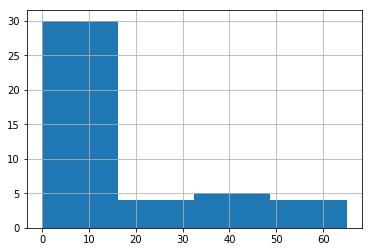

In [165]:
# Visualize our total likes based on a histogram

import matplotlib.pyplot as plt
houston_venues['total likes'].hist(bins=4)
plt.show()

In [166]:
# what are the bins we want to use?

print(np.percentile(houston_venues['total likes'], 25))
print(np.percentile(houston_venues['total likes'], 50))
print(np.percentile(houston_venues['total likes'], 75))

2.0
7.0
20.5


In [168]:
# Rate the Restaurant  
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = houston_venues['total likes']<=24
below_avg = houston_venues[(houston_venues['total likes']>24) & (houston_venues['total likes']<=45)]
abv_avg = houston_venues[(houston_venues['total likes']>45) & (houston_venues['total likes']<=76)]
great = houston_venues['total likes']>76

In [170]:
# Set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'avg avg'
    if s['total likes']>76:
        return 'great'

houston_venues['total likes_cat']=houston_venues.apply(conditions, axis=1)

In [171]:
houston_venues

,name,id,categories,lat,lng,total likes,total likes_cat
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574,39,below avg
1,Phi Coffee & Tea,56fb3623498efb9f4e0bc7cb,Bubble Tea Shop,29.702198,-95.576538,6,poor
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401,34,below avg
3,Crawfish & Noodles,4bae9302f964a52051c23be3,Vietnamese Restaurant,29.704233,-95.580199,59,avg avg
5,Bambu Desserts & Drinks,50c3e999183f86734515bff4,Café,29.702977,-95.568522,49,avg avg
6,Eck Bakery,4c057493191f20a1221de314,Chinese Restaurant,29.702215,-95.571572,7,poor
7,Quan Yin Vegetarian Restaurant,4bdb634163c5c9b64cb92768,Vegetarian / Vegan Restaurant,29.704523,-95.570713,26,below avg
8,Cajun Kitchen,4f415b57e4b0f4d09c696caf,Cajun / Creole Restaurant,29.701542,-95.571513,38,below avg
9,Tony Thai Restaurant,4b2dab2ef964a52034da24e3,Thai Restaurant,29.702919,-95.569380,34,below avg
11,Com Tam Kieu Giang,4c66c9f9e75ac928aa77f8da,Vietnamese Restaurant,29.702297,-95.578452,4,poor


In [183]:
# Recategorizing the categories

houston_venues['categories'].unique()

array(['Cajun / Creole Restaurant', 'Bubble Tea Shop', 'Noodle House',
       'Vietnamese Restaurant', 'Café', 'Chinese Restaurant',
       'Vegetarian / Vegan Restaurant', 'Thai Restaurant', 'Tea Room',
       'Dim Sum Restaurant', 'Asian Restaurant', 'Mexican Restaurant',
       'Bank', 'Sandwich Place', 'Massage Studio', 'Storage Facility',
       'Seafood Restaurant', 'Donut Shop', 'Food & Drink Shop',
       'Snack Place', 'Cantonese Restaurant', 'Market', 'Spa',
       'American Restaurant', 'Gas Station'], dtype=object)

In [184]:
# Create  new categories and  a function  

bars = ['Pub', 'Cocktail Bar', 'Bar', 'Dive Bar', 'Sports Bar']
other = ['Bagel Shop', 'Tea Room', 'Donut Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Sandwich Place', 'Boutique', 'Ice Cream Shop']
asian_indian_food = ['Falafel Restaurant', 'Korean Restaurant','Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Poke Place', 'Thai Restaurant', 'Vietnamese Restaurant']
mex_southam_food = ['Cuban Restaurant', 'Mexican Restaurant', 'South American Restaurant', 'Latin American Restaurant']
american_food = ['Burger Joint', 'Restaurant', 'American Restaurant']
italian_food = ['Italian Restaurant', 'Seafood Restaurant', 'Pizza Place']

def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in  asian_indian_food:
        return 'euro asia indian food'
    if s['categories'] in mex_southam_food:
        return 'mex southam food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'

houston_venues['categories_new']=houston_venues.apply(conditions2, axis=1)

In [185]:
houston_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574,39,below avg,None
1,Phi Coffee & Tea,56fb3623498efb9f4e0bc7cb,Bubble Tea Shop,29.702198,-95.576538,6,poor,other
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401,34,below avg,None
3,Crawfish & Noodles,4bae9302f964a52051c23be3,Vietnamese Restaurant,29.704233,-95.580199,59,avg avg,euro asia indian food
5,Bambu Desserts & Drinks,50c3e999183f86734515bff4,Café,29.702977,-95.568522,49,avg avg,None
6,Eck Bakery,4c057493191f20a1221de314,Chinese Restaurant,29.702215,-95.571572,7,poor,None
7,Quan Yin Vegetarian Restaurant,4bdb634163c5c9b64cb92768,Vegetarian / Vegan Restaurant,29.704523,-95.570713,26,below avg,None
8,Cajun Kitchen,4f415b57e4b0f4d09c696caf,Cajun / Creole Restaurant,29.701542,-95.571513,38,below avg,None
9,Tony Thai Restaurant,4b2dab2ef964a52034da24e3,Thai Restaurant,29.702919,-95.569380,34,below avg,euro asia indian food
11,Com Tam Kieu Giang,4c66c9f9e75ac928aa77f8da,Vietnamese Restaurant,29.702297,-95.578452,4,poor,euro asia indian food


Create dummy variables for our total likes and categories in order to cluster them

In [188]:
#one hot encoding
houston_onehot = pd.get_dummies(houston_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
houston_onehot['Name'] = houston_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [houston_onehot.columns[-1]] + list(houston_onehot.columns[:-1])
houston_onehot = houston_onehot[fixed_columns]

houston_onehot.head()

,Name,american food,euro asia indian food,italian food,mex southam food,other,avg avg,below avg,poor
0,Crawfish Cafe,0,0,0,0,0,0,1,0
1,Phi Coffee & Tea,0,0,0,0,1,0,0,1
2,Pho Binh,0,0,0,0,0,0,1,0
3,Crawfish & Noodles,0,1,0,0,0,1,0,0
5,Bambu Desserts & Drinks,0,0,0,0,0,1,0,0


<big> <b> Clustering  </b> </big>

Run our k-means clustering algo to get our labels

In [190]:
cluster_df = houston_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)
hoboken_venues['label'] = kmeans.labels_

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 3, 3, 1, 0, 0, 0, 2], dtype=int32)

Add cluster labels back into our original dataframe

In [191]:
houston_venues['label'] = kmeans.labels_
houston_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574,39,below avg,None,0
1,Phi Coffee & Tea,56fb3623498efb9f4e0bc7cb,Bubble Tea Shop,29.702198,-95.576538,6,poor,other,1
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401,34,below avg,None,0
3,Crawfish & Noodles,4bae9302f964a52051c23be3,Vietnamese Restaurant,29.704233,-95.580199,59,avg avg,euro asia indian food,3
5,Bambu Desserts & Drinks,50c3e999183f86734515bff4,Café,29.702977,-95.568522,49,avg avg,None,3


In [ ]:
Visualize the clusters

In [192]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(houston_venues['lat'], houston_venues['lng'], houston_venues['name'], houston_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [194]:
houston_venues.loc[houston_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Crawfish Cafe,512837f2e412ca55945dc06d,Cajun / Creole Restaurant,29.702619,-95.578574,39,below avg,None,0
2,Pho Binh,4c703232b5a5236a52884f52,Noodle House,29.703914,-95.570401,34,below avg,None,0
7,Quan Yin Vegetarian Restaurant,4bdb634163c5c9b64cb92768,Vegetarian / Vegan Restaurant,29.704523,-95.570713,26,below avg,None,0
8,Cajun Kitchen,4f415b57e4b0f4d09c696caf,Cajun / Creole Restaurant,29.701542,-95.571513,38,below avg,None,0
9,Tony Thai Restaurant,4b2dab2ef964a52034da24e3,Thai Restaurant,29.702919,-95.569380,34,below avg,euro asia indian food,0
30,Lee's Sandwiches,4b6db576f964a52072882ce3,Vietnamese Restaurant,29.704244,-95.576227,40,below avg,euro asia indian food,0


Observations:
Most of the shopping malls are concentrated in the central area of Kuala Lumpur city, with the highest number in cluster 2 and moderate number in cluster 0. On the other hand, cluster 1 has very low number to totally no shopping mall in the neighborhoods. This represents a great opportunity and high potential areas to open new shopping malls as there is very little to no competition from existing malls. Meanwhile, shopping malls in cluster 2 are likely suffering from intense competition due to oversupply and high concentration of shopping malls. From another perspective, this also shows that the oversupply of shopping malls mostly happened in the central area of the city, with the suburb area still have very few shopping malls. Therefore, this project recommends property developers to capitalize on these findings to open new shopping malls in neighborhoods in cluster 1 with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new shopping malls in neighborhoods in cluster 0 with moderate competition. Lastly, property developers are advised to avoid neighborhoods in cluster 2 which already have high concentration of shopping malls and suffering from intense competition.